In [1]:

import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

In [2]:
df = pd.read_csv("processed_Bullying_v1.csv")
df.head()

,Unnamed: 0,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese,body_level
0,0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN,NaN
1,1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,NaN,NaN
2,2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No,1.0
3,3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No,1.0
4,4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(columns=[df.columns[0], 'Were_underweight', 'Were_overweight', 'Were_obese'])
df = df.dropna()


In [4]:
df.head(15)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,body_level
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,1.0
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,1.0
10,11,No,No,No,15 years old,Male,0 times,1 time,Never,3 or more,3 to 5 days,Most of the time,Always,No,Yes,1.0
22,23,No,No,Yes,13 years old,Male,0 times,2 or 3 times,Most of the time,3 or more,0 days,Rarely,Always,Yes,No,1.0
23,24,No,No,No,14 years old,Male,0 times,2 or 3 times,Most of the time,2,0 days,Always,Sometimes,Yes,No,3.0
31,32,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Most of the time,Always,No,No,1.0
33,34,No,No,No,14 years old,Female,0 times,0 times,Never,3 or more,0 days,Always,Always,No,No,1.0
37,38,No,No,No,13 years old,Male,0 times,8 or 9 times,Rarely,3 or more,10 or more days,Always,Rarely,No,Yes,1.0
39,40,No,No,Yes,13 years old,Female,0 times,1 time,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,1.0
41,42,Yes,No,Yes,13 years old,Male,0 times,1 time,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,2.0


# Lets clean some columns
<li>Physically_attacked  --> take lower bound number</li>
<li>Physical_fighting  --> take lower bound number</li>
<li>Miss_school_no_permission  --> take lower bound number</li>
<li>Missed_classes_or_school_without_permission  --> convert to boolean</li>
<li>New COLUMN "engaged_in_a_fight"  --> boolean column, if the student undergoes any form of fighting</li>

In [5]:
df['Custom_Age'] = df['Custom_Age'].replace('[a-zA-Z ]+', '', regex=True).astype('int64')
df['Physically_attacked'] = df['Physically_attacked'].replace('or', ',', regex=True)
df['Physically_attacked'] = df['Physically_attacked'].replace('[a-zA-Z ]+', '', regex=True)
df['Physically_attacked'] = df['Physically_attacked'].replace(',[0-9]*', '', regex=True).astype('int64')


df['Physical_fighting'] = df['Physical_fighting'].replace('or', ',', regex=True)
df['Physical_fighting'] = df['Physical_fighting'].replace('[a-zA-Z ]+', '', regex=True)
df['Physical_fighting'] = df['Physical_fighting'].replace(',[0-9]*', '', regex=True).astype('int64')


df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('or', ',', regex=True)
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('to', ',', regex=True)
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace('[a-zA-Z ]+', '', regex=True)
df['Miss_school_no_permission'] = df['Miss_school_no_permission'].replace(',[0-9]*', '', regex=True).astype('int64')



df.loc[df['Missed_classes_or_school_without_permission'] == 'Yes', ['Missed_classes_or_school_without_permission']] = True
df.loc[df['Missed_classes_or_school_without_permission'] == 'No', ['Missed_classes_or_school_without_permission']] = False
df['Missed_classes_or_school_without_permission'] = df['Missed_classes_or_school_without_permission'].astype('bool')

df['engaged_in_a_fight'] = False*len(df)
df.loc[(df['Physical_fighting'] >0)|(df['Physically_attacked']>0), 'engaged_in_a_fight'] = True
df['engaged_in_a_fight'] = df['engaged_in_a_fight'].astype('bool')

df.head(10)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,body_level,engaged_in_a_fight
2,3,No,No,No,14,Male,0,0,Never,3 or more,0,Sometimes,Always,No,False,1.0,False
5,6,No,No,No,13,Male,0,1,Never,3 or more,0,Most of the time,Always,No,False,1.0,True
10,11,No,No,No,15,Male,0,1,Never,3 or more,3,Most of the time,Always,No,True,1.0,True
22,23,No,No,Yes,13,Male,0,2,Most of the time,3 or more,0,Rarely,Always,Yes,False,1.0,True
23,24,No,No,No,14,Male,0,2,Most of the time,2,0,Always,Sometimes,Yes,False,3.0,True
31,32,No,No,No,13,Female,0,0,Never,3 or more,0,Most of the time,Always,No,False,1.0,False
33,34,No,No,No,14,Female,0,0,Never,3 or more,0,Always,Always,No,False,1.0,False
37,38,No,No,No,13,Male,0,8,Rarely,3 or more,10,Always,Rarely,No,True,1.0,True
39,40,No,No,Yes,13,Female,0,1,Rarely,3 or more,0,Most of the time,Most of the time,No,False,1.0,True
41,42,Yes,No,Yes,13,Male,0,1,Rarely,3 or more,0,Most of the time,Most of the time,No,False,2.0,True


In [6]:
df.columns

Index(['record', 'Bullied_on_school_property_in_past_12_months',
       'Bullied_not_on_school_property_in_past_12_months',
       'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex',
       'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely',
       'Missed_classes_or_school_without_permission', 'body_level',
       'engaged_in_a_fight'],
      dtype='object')

In [7]:
df.dtypes

record                                                int64
Bullied_on_school_property_in_past_12_months         object
Bullied_not_on_school_property_in_past_12_months     object
Cyber_bullied_in_past_12_months                      object
Custom_Age                                            int64
Sex                                                  object
Physically_attacked                                   int64
Physical_fighting                                     int64
Felt_lonely                                          object
Close_friends                                        object
Miss_school_no_permission                             int64
Other_students_kind_and_helpful                      object
Parents_understand_problems                          object
Most_of_the_time_or_always_felt_lonely               object
Missed_classes_or_school_without_permission            bool
body_level                                          float64
engaged_in_a_fight                      

### 2nd Question:
#What's the percentage of people being cyberbullied?
#→ statistical model


In [8]:
#Percent of students being cyberbullied
Cyber_Perc = (len(df.loc[df['Cyber_bullied_in_past_12_months'] == 'Yes'])/len(df))*100
BullOnSchool_Perc = (len(df.loc[df['Bullied_on_school_property_in_past_12_months'] == 'Yes'])/len(df))*100
BullNotOnSchool_Perc = (len(df.loc[df['Bullied_not_on_school_property_in_past_12_months'] == 'Yes'])/len(df))*100

print(f"Percentage of Students Bullied in school:\n{BullOnSchool_Perc}%\n\n")
print(f"Percentage of Students Bullied outside school:\n{BullNotOnSchool_Perc}%\n\n")
print(f"Percentage of Students CyberBullied:\n{Cyber_Perc}%\n\n")


Bullied_Joint_Matrix = pd.crosstab([df['Bullied_on_school_property_in_past_12_months'], df['Bullied_not_on_school_property_in_past_12_months']]\
                                   ,[df['Cyber_bullied_in_past_12_months']])
Bullied_Joint_Matrix.head()

Percentage of Students Bullied in school:
20.857368389094663%


Percentage of Students Bullied outside school:
22.20231950938126%


Percentage of Students CyberBullied:
22.405731981298196%




Cyber_bullied_in_past_12_months                                                                   No   
Bullied_on_school_property_in_past_12_months Bullied_not_on_school_property_in_past_12_months          
No                                           No                                                19553  \
                                             Yes                                                2275   
Yes                                          No                                                 2398   
                                             Yes                                                1332   

Cyber_bullied_in_past_12_months                                                                 Yes  
Bullied_on_school_property_in_past_12_months Bullied_not_on_school_property_in_past_12_months        
No                                           No                                                2750  
                                             Yes                                               1490  
Yes                                          No                                                 924  
                                             Yes                                               2216

### Notice we should not stop at the percentage of each column, as a lot of entries are joint, a student might be bullied on school and outside it and cyberbullied at the same time
### it is better to use a joint matrix

In [9]:
#Percent of students Bullied in school and outside school
Bullied_Perc = (len(df.loc[(df['Bullied_not_on_school_property_in_past_12_months'] == 'Yes')&(df['Bullied_on_school_property_in_past_12_months'] =='Yes')])/len(df))*100
print(f"Percentage of students Bullied in school and outside school: \n{Bullied_Perc}%")

Percentage of students Bullied in school and outside school: 
10.771752990466938%


In [10]:
#Percent of students not bullied on school but bullied outside school (expectation to be low percentage)
Bullied_Perc = (len(df.loc[(df['Bullied_not_on_school_property_in_past_12_months'] == 'Yes')&(df['Bullied_on_school_property_in_past_12_months'] =='No')])/len(df))*100
print(f"Percentage of students Bullied in school BUT NOT outside school: \n{Bullied_Perc}%")

Percentage of students Bullied in school BUT NOT outside school: 
11.430566518914324%


## --> bullied both in school and outside school is a large percentage from all students,
## --> half of bullied students on school experience bullying also outside school,
## --> but very small number of students who don't get bullied in school experience bullying outside school

## --> this concludes that a student is more likely to experience different forms of bullying if he was bullied on school

## --> this also means that the psychological reasons for bullying a kid is in the kid himself (his personality/appearance/talking skills)
## --> not due to the school's other students

In [11]:
### 6th Question:
#What is the relationship between physically attacked and missing class or school without permission?
#→ statistical model + graphical representation


In [12]:
df.columns

Index(['record', 'Bullied_on_school_property_in_past_12_months',
       'Bullied_not_on_school_property_in_past_12_months',
       'Cyber_bullied_in_past_12_months', 'Custom_Age', 'Sex',
       'Physically_attacked', 'Physical_fighting', 'Felt_lonely',
       'Close_friends', 'Miss_school_no_permission',
       'Other_students_kind_and_helpful', 'Parents_understand_problems',
       'Most_of_the_time_or_always_felt_lonely',
       'Missed_classes_or_school_without_permission', 'body_level',
       'engaged_in_a_fight'],
      dtype='object')

In [13]:
MissClass_PhysAttacked = df.loc[:,['Physically_attacked','Physical_fighting', 'Miss_school_no_permission']].corr()
MissClass_PhysAttacked.head()

,Physically_attacked,Physical_fighting,Miss_school_no_permission
Physically_attacked,1.000000,0.306828,0.079428
Physical_fighting,0.306828,1.000000,0.125020
Miss_school_no_permission,0.079428,0.125020,1.000000


# notice that physical fights correlates more to missing school than physical attacks (fights are more violent than just attacks)

In [14]:
MissClass2_PhysAttacked = df.loc[:,['Physically_attacked','Physical_fighting', 'Missed_classes_or_school_without_permission']].corr()
MissClass2_PhysAttacked.head()

,Physically_attacked,Physical_fighting,Missed_classes_or_school_without_permission
Physically_attacked,1.000000,0.306828,0.073569
Physical_fighting,0.306828,1.000000,0.111244
Missed_classes_or_school_without_permission,0.073569,0.111244,1.000000


In [15]:
MissClass3_PhysAttacked = df.loc[:,['engaged_in_a_fight', 'Missed_classes_or_school_without_permission']].corr()
MissClass3_PhysAttacked.head()

,engaged_in_a_fight,Missed_classes_or_school_without_permission
engaged_in_a_fight,1.000000,0.144095
Missed_classes_or_school_without_permission,0.144095,1.000000


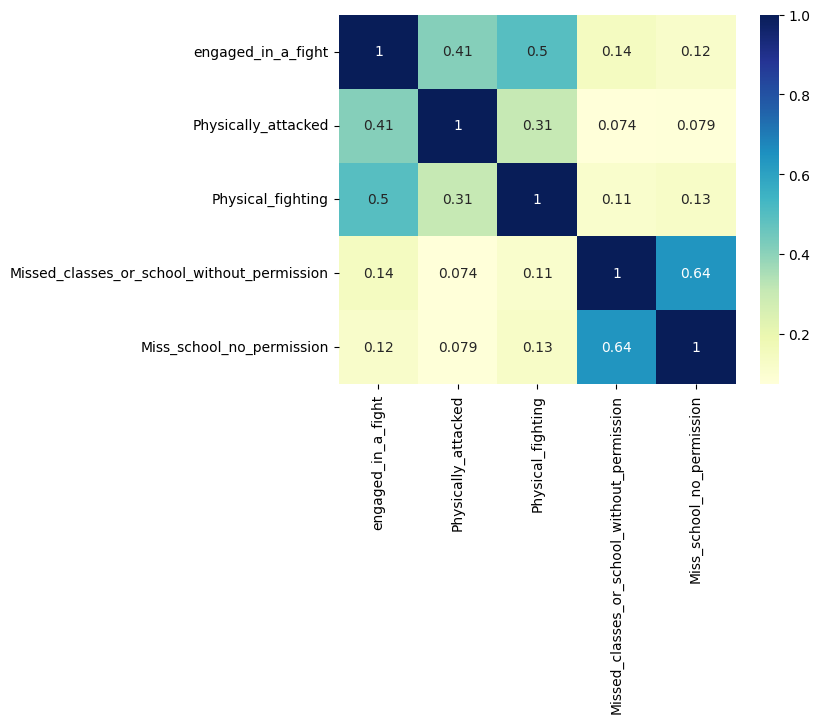

In [16]:
MissClass4_PhysAttacked = df.loc[:,['engaged_in_a_fight','Physically_attacked','Physical_fighting', 'Missed_classes_or_school_without_permission', 'Miss_school_no_permission']].corr()
#MissClass4_PhysAttacked.head()
dataplot = sb.heatmap(MissClass4_PhysAttacked, cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

In [17]:
#TODO: PLOT A STACKED BAR PLOT

In [18]:
df.to_csv('processed_Bullying_Ayman.csv')

In [19]:
#for col in df.columns:
#    print(df[col].value_counts())

record
3        1
37875    1
37829    1
37828    1
37827    1
        ..
19434    1
19433    1
19432    1
19430    1
57095    1
Name: count, Length: 32938, dtype: int64
Bullied_on_school_property_in_past_12_months
No     26068
Yes     6870
Name: count, dtype: int64
Bullied_not_on_school_property_in_past_12_months
No     25625
Yes     7313
Name: count, dtype: int64
Cyber_bullied_in_past_12_months
No     25558
Yes     7380
Name: count, dtype: int64
Custom_Age
16    7611
15    7349
14    6967
17    5475
13    5237
18     231
12      56
11      12
Name: count, dtype: int64
Sex
Female    17679
Male      15259
Name: count, dtype: int64
Physically_attacked
0     27461
1      3003
2      1345
4       408
12      403
6       166
8        95
10       57
Name: count, dtype: int64
Physical_fighting
0     25496
1      3884
2      2045
4       563
12      466
6       267
8       133
10       84
Name: count, dtype: int64
Felt_lonely
Never               9941
Sometimes           8874
Rarely            